<a href="https://colab.research.google.com/github/ChaejinE/MyPytorch/blob/main/PyTorch_Tips_Details/g_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

# Autograd 사용 방법
## Autograd
- 자동 미분 (Auto differentitation)을 이용해 Gradient 계산

## 만족되어야 하는 조건
1. tensor option이 requires_grad = True로 되어있어야 한다. (**Default가 False**)
2. backpropagation 시작 지점의 output은 scalar 형태여야한다.

## tensor의 gradient 구하는 방법 
- backpropagtion 시작 지점의 tensor에서 .backward()함수 호출

## gradient 값 확인
- requries_grad = True인 Tensor에서 .grad 통해 확인

In [2]:
x1 = torch.ones(2, 2)
x1

tensor([[1., 1.],
        [1., 1.]])

In [3]:
x2 = torch.ones(2, 2, requires_grad=True)
x2

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [4]:
y1 = x1 + 2
y1

tensor([[3., 3.],
        [3., 3.]])

In [6]:
y2 = x2 + 2
y2 # grad_fn 확인
# grad fn : 텐서가 어떤 연산을 하였는지에대한 연산 정보를 담는다. 이 정보는 역전파 과정에서 사용된다.

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

- 역전파를 위해 기록되는 grad_fn : AddBackWard0, SubBackward0, Mul.., Div와 같이 저장된다.

In [8]:
y1 = x2 + 2
y1

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [10]:
y2 = x2 - 2
y2

tensor([[-1., -1.],
        [-1., -1.]], grad_fn=<SubBackward0>)

In [12]:
y3 = x2 * 2
y3

tensor([[2., 2.],
        [2., 2.]], grad_fn=<MulBackward0>)

In [13]:
y4 = x2 / 2
y4

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]], grad_fn=<DivBackward0>)

- var.requires\_grad_(True)를 하면 속성값을 추가할 수 있다.
- **다만, 위처럼 별도로 추가한 경우, 앞에서 연산한 이력이 grad_fn에 자동으로 저장되지는 않는다.** (Warning)

# derivative 기본 예제

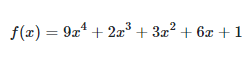

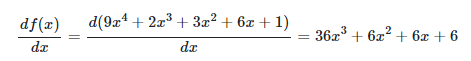

- df/dx를 통해 **x = a 지점의 경사를 구할 수 있다.**
- if) x=2, 36 x 2^3 + 6 x 2^2 + 6 x 2 + 6 = 330이 2일 때의 변화율이다.

In [15]:
x = torch.tensor(2.0, requires_grad=True)
y = 9*x**4 + 2*x**3 + 3*x**2 + 6*x + 1

In [16]:
y.backward()

In [17]:
x.grad

tensor(330.)

- 유심히 봐야할 점은 **output(y)가 scalar라는 사실이다.**
  - scalar 가 출력이어야 backward 연산이 된다.

In [19]:
x = torch.randn(2, 2, requires_grad=True)
y = x + 2
z = (y * y).sum() # sum을 안하면 scalar가 아니라 2x2 Matrix 된다. -> Error
z.backward()
print(f"x:{x}")
print(f"y:{y}")
print(f"z:{z}")
print(f"x.grad:{x.grad}")
print(f"y:{y.grad}")
print(f"z:{z.grad}")

# x는 실제 값이 할당되는 Tensor다. backward를 통해 계산된 grad가 저장된다.
# 반면 중간 과정(y, z)는 실제 grad가 저장되지 않고 backword 연산에만 참여된 것으로 본다. grad is None !!

x:tensor([[ 0.6956, -0.1598],
        [ 0.5608,  0.8906]], requires_grad=True)
y:tensor([[2.6956, 1.8402],
        [2.5608, 2.8906]], grad_fn=<AddBackward0>)
z:25.566268920898438
x.grad:tensor([[5.3913, 3.6804],
        [5.1215, 5.7813]])
y:None
z:None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  # Remove the CWD f

# backward, Matrix에서 진행하려면 ?


In [21]:
x = torch.randn(2, 2, requires_grad=True)
y = x + 2
z = (y * y)
y.backward(z) # z를 tensor.backward()의 인자로 넣어주면 연산이 된다.

x.grad

tensor([[4.6137, 3.6249],
        [0.0516, 2.9761]])

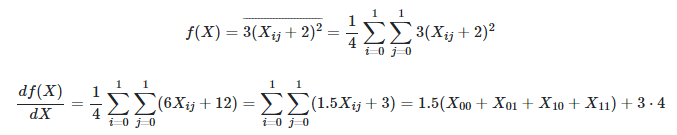
- 이런 식의 예제를 풀어보자

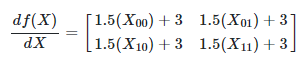
- 2x2 matrix X의 미분 결과는 위와 같을 것이다.

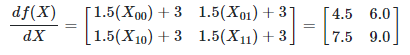
- if) X=\[1., 2., 3., 4.], 위와 같이 gradient를 구할 수 있게 된다.

In [25]:
x = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True) # X_ij
y = x + 2 # (X_ij + 2)
z = y * y * 3 # 3*(X_ij + 2)^2
out = z.mean() # (1/4)3*(X_ij + 2)^2

out.backward()
x.grad

# 결과가 일치한다.

tensor([[4.5000, 6.0000],
        [7.5000, 9.0000]])

# Partial Derivative
image.png

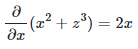
- x 에 대한 편미분

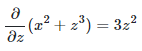
- z에 대한 편미분

image.png
- 위 연산을 진행해 보자

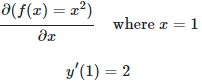
- x에 관하여 연산

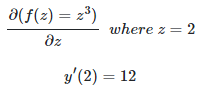
- z에 관한 연산


In [27]:
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3
y.backward()

print(f"x.grad : {x.grad}")
print(f"y.grad : {y.grad}")
print(f"z.grad : {z.grad}")

x.grad : 2.0
y.grad : None
z.grad : 12.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  import sys


# Traning Mode & Evalutation Mode
- gradient : 학습 대상이 되는 weight
- 학습 후 inference 단계에서 굳이 학습 모드 사용할 필요 x
- torch.no_grad() -> 적용 시 실제 속성이 requires_grad=True더라도 **gradient update 하지 않는다.**
  - **dropout, batchnormalization 등이 적용되지 않는다.**
  

In [28]:
x = torch.tensor(1.0, requires_grad=True)
x.requires_grad

True

In [29]:
with torch.no_grad():
  print(x.requires_grad)
  print((x**2).requires_grad) # False, Tensor가 어떤 연산이 적용될 때 False로 변경되는 것을 알 수 있다.

print(x.requires_grad) # True, with문 벗어나면 다시 원복된다.


True
False
True
